# Time Series - LTSM

## 1. Sourcing and Loading

###  Load relevant libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA
import datetime

In [3]:
filename = 'C:/Users/gayat/Desktop/CowboyCigsData.csv'

cigData = pd.read_csv(filename)

### 1c. Explore the data
We now need to check whether the data conduces to a time series style analysis.

In [4]:
cigData.head(4)

,Unnamed: 0,Time,#CigSales
0,0,1949-01,1000112
1,1,1949-02,1000118
2,2,1949-03,1000132
3,3,1949-04,1000129


Check out the columns feature of the data

In [5]:
cigData.columns

Index(['Unnamed: 0', 'Time', '#CigSales'], dtype='object')

Let's check out the data types of our columns.

In [6]:
cigData.dtypes

Unnamed: 0     int64
Time          object
#CigSales      int64
dtype: object

Check whether there are any null values. 

In [7]:
cigData.isna().sum()

Unnamed: 0    0
Time          0
#CigSales     0
dtype: int64

## 2. Cleaning, transforming and visualizing

### Dropping unwanted columns
We need to cut that `Unnamed: 0` column. Delete it here.

In [8]:
cigData.drop(columns='Unnamed: 0',inplace=True)

We can see that the `Time` column actually has the granularity of months. Change the name of that column to `Month`.

In [9]:
cigData.rename(columns={'Time':'Month'},inplace=True)

Call a head() to check this has worked. 

In [10]:
cigData.head(5)

,Month,#CigSales
0,1949-01,1000112
1,1949-02,1000118
2,1949-03,1000132
3,1949-04,1000129
4,1949-05,1000121


###  Type conversions 

In [11]:
cigData['Month'] = pd.to_datetime(cigData['Month'])

In [12]:
cigData.set_index('Month',inplace=True)

In [13]:
cigData.head(4)

,#CigSales
Month,
1949-01-01,1000112
1949-02-01,1000118
1949-03-01,1000132
1949-04-01,1000129


###  Making a predictor variable `y`

The data is now indexed by date, as time series data ought to be.

Since we want to predict the number of cigarette sales at Cowboy cigarettes, and `y` is typically used to signify a predictor variable, let's create a new variable called `y` and assign the indexed #Passenger column. 

In [14]:
y = cigData['#CigSales']

Check the type of our new variable. 

In [15]:
y

Month
1949-01-01    1000112
1949-02-01    1000118
1949-03-01    1000132
1949-04-01    1000129
1949-05-01    1000121
               ...   
1960-08-01    1000606
1960-09-01    1000508
1960-10-01    1000461
1960-11-01    1000390
1960-12-01    1000432
Name: #CigSales, Length: 144, dtype: int64

### . Getting summary statistics for `y`

Get the summary statistics of our data here. 

In [16]:
y.describe()

count    1.440000e+02
mean     1.000280e+06
std      1.199663e+02
min      1.000104e+06
25%      1.000180e+06
50%      1.000266e+06
75%      1.000360e+06
max      1.000622e+06
Name: #CigSales, dtype: float64

###  Plotting `y`

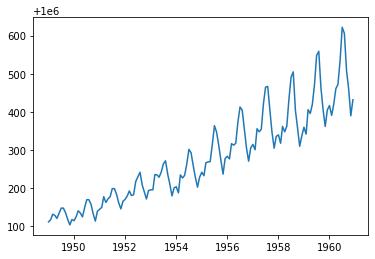

In [17]:
plt.plot(y)

In our plot, we can see that both the mean and the variance increase as time progresses. At the moment, our data has neither a constant mean, nor a constant variance.


### 3. Decomposition


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose



<Figure size 432x288 with 0 Axes>

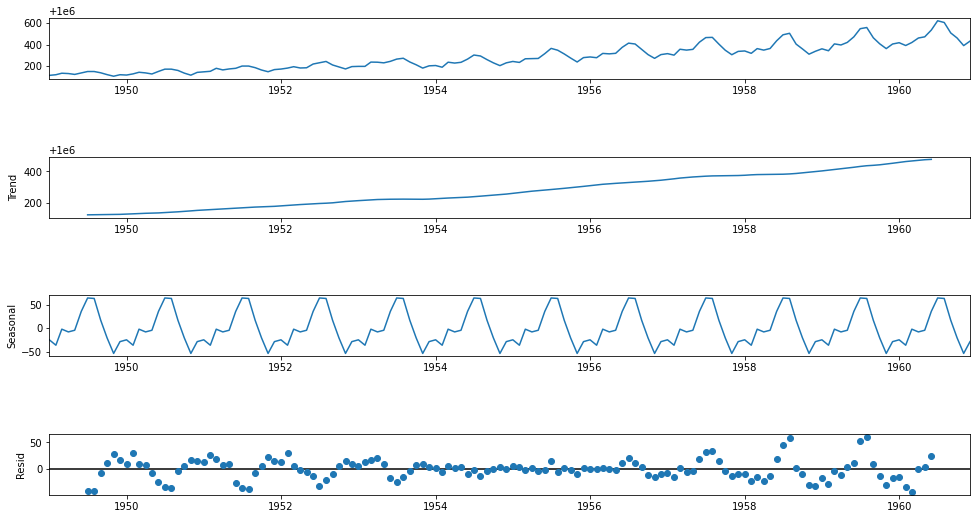

In [19]:
decomposition = seasonal_decompose(cigData)

# Plot the original data, the trend, the seasonality, and the residuals 
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)


### Testing for stationarity with KPSS
As you know, when doing time series analysis we always have to check for stationarity. Imprecisely, a time series dataset is stationary just if its statistical features don't change over time. A little more precisely, a stationary time series dataset will have constant mean, variance, and covariance.

There are many ways to test for stationarity, but one of the most common is the KPSS test. The Null hypothesis of this test is that the time series data in question is stationary; hence, if the *p*-value is less than the significance level (typically 0.05, but we decide) then we reject the Null and infer that the data is not stationary.

In [20]:
from statsmodels.tsa.stattools import kpss
kpss(y)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.0521750110138661,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Since our p-value is less than 0.05, we should reject the Null hypothesis and deduce the non-stationarity of our data. 



### Testing for stationary with ADFuller 

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
results = adfuller(y)
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(0.8153688792059381, 0.9918802434376393, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390188)
The p-value of the test on prices is: 0.9918802434376393


Since p-value is greater than .05 we fail to reject the Null hypothesis. That means the data is non-stationary 

In [23]:
# Taking the log of y to make the variance constant across

import numpy as np

y_log = np.log(y)

<AxesSubplot:xlabel='Month'>

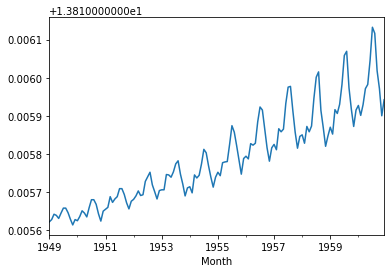

In [24]:
y_log.plot()

In [25]:
y_log.describe()

count    144.000000
mean      13.815791
std        0.000120
min       13.815615
25%       13.815691
50%       13.815776
75%       13.815871
max       13.816132
Name: #CigSales, dtype: float64

### ARIMA model



In [26]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error



In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
from statsmodels.tsa.arima.model import ARIMA

####  Make a function to find the MSE of a single ARIMA model


In [29]:
def MSE(data,arima_order):
    s = int(len(data)* 0.8)
    train, test = data[0:s],data[s:len(data)]
    past = [x for x in train]
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(past, order = arima_order)
        model_fit = model.fit()
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    error = mean_squared_error(test, predictions)
    return error

####  Make a function to evaluate the different ARIMA models with different p, d, and q values

In [30]:
def evaluation(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    print(best_score)
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                mse = MSE(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.12f' %(order, mse))
            
    return print('Best ARIMA%s MSE=%.12f' % (best_cfg, best_score))

In [31]:
# Now, we choose a couple of values to try for each parameter.
p_values = [0, 1,2]
d_values = [0,1,2]
q_values = [0,1,2]



In [32]:
# we can find the optimum ARIMA model for our data.

import warnings
warnings.filterwarnings("ignore")
evaluation(y_log, p_values, d_values, q_values)

inf
ARIMA(0, 0, 0) MSE=0.000000040242
ARIMA(0, 0, 1) MSE=0.000000040235
ARIMA(0, 0, 2) MSE=0.000000030831
ARIMA(0, 1, 0) MSE=0.000000002749
ARIMA(0, 1, 1) MSE=0.000000002442
ARIMA(1, 0, 1) MSE=0.000000002420
ARIMA(1, 1, 2) MSE=0.000000002322
ARIMA(2, 1, 1) MSE=0.000000002270
Best ARIMA(2, 1, 1) MSE=0.000000002270


 **p,d, q, parameters for our ARIMA model are 2, 1, 1 respectively. Now we know this, we can build the model.**

In [33]:
p = 2
d = 1
q = 1
model = ARIMA(y_log, order = (p,d,q))
model_fit = model.fit()


**We can take a look at a summary of the model this library has built around our data.**

In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              #CigSales   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1287.245
Date:                Wed, 09 Nov 2022   AIC                          -2566.490
Time:                        13:01:37   BIC                          -2554.639
Sample:                    01-01-1949   HQIC                         -2561.674
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0575   1.33e-19   7.98e+18      0.000       1.057       1.057
ar.L2         -0.4391   7.17e-19  -6.12e+17      0.000      -0.439      -0.439
ma.L1         -0.7080   3.89e-20  -1.82e+19      0.000      -0.708      -0.708
sigma2      7.158e-10   2.65e-10      2.705      0.007    1.97e-10    1.23e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.40   Prob(JB):                         0.73
Heteroskedasticity (H):               7.95   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.18e+35. Standard errors may be unstable.
"""

**Lower value of AIC indicates the model can predict better** <br>
**The value of BIC is also lower which indicates good exploratory model**


In [35]:

residuals = pd.DataFrame(model_fit.resid)


The Residual plot show that mean is 0 which is good

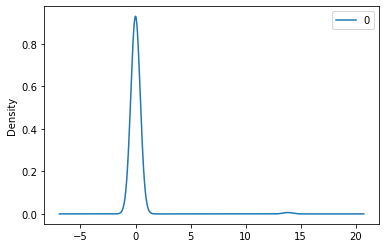

In [36]:
residuals.plot(kind='kde')
plt.show()

In [37]:
print(residuals.describe())

                0
count  144.000000
mean     0.095945
std      1.151302
min     -0.000084
25%     -0.000016
50%     -0.000002
75%      0.000025
max     13.815623


###  Application: Forecasting

our model fits pretty closely to our existing data. Let's now use it to forecast what's likely to occur in future.

In [41]:
y_log

Month
1949-01-01    13.815623
1949-02-01    13.815629
1949-03-01    13.815643
1949-04-01    13.815640
1949-05-01    13.815632
                ...    
1960-08-01    13.816116
1960-09-01    13.816018
1960-10-01    13.815971
1960-11-01    13.815900
1960-12-01    13.815942
Name: #CigSales, Length: 144, dtype: float64

In [42]:
# Creating a forecast for next 3 years using the model

forecast_period = 36
forecast = model_fit.forecast(36)


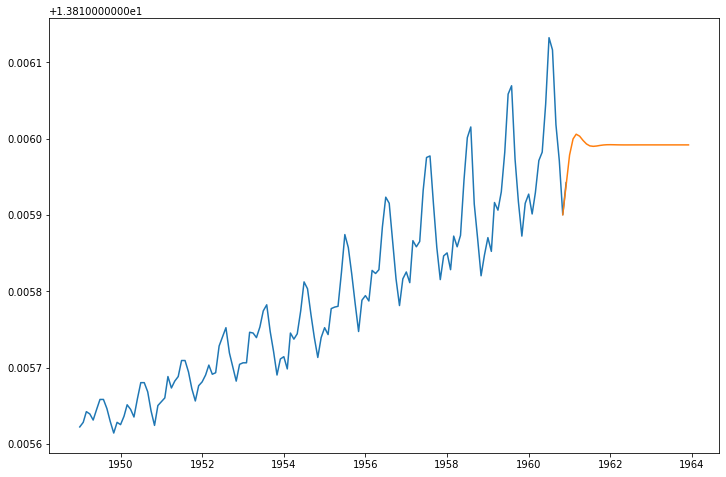

In [40]:
# Plot your future predictions
plt.figure(figsize=(12,8))
plt.plot(y_log)
plt.plot(y_log['Nov 1960'].append(forecast))
plt.show()

### LSTM

In [46]:
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
    from tensorflow.keras.optimizers import SGD
except:
    !pip install keras
    !pip install h5py==3.1.0 numpy==1.19.2 six==1.15.0 typing-extensions==3.7.4 wrapt==1.12.1 botocore==1.20.106 gast==0.4.0 tensorboard==2.6 tensorflow-estimator==2.6 absl-py==0.9 protobuf==3.11.2 scikit-learn==0.24 fsspec==2021.07.0 google-api-python-client==1.12.1
    !pip install --upgrade tensorflow
    !pip install --ignore-installed --upgrade tensorflow-gpu==1.15.0
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
    from tensorflow.keras.optimizers import SGD

In [47]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [48]:
y

Month
1949-01-01    1000112
1949-02-01    1000118
1949-03-01    1000132
1949-04-01    1000129
1949-05-01    1000121
               ...   
1960-08-01    1000606
1960-09-01    1000508
1960-10-01    1000461
1960-11-01    1000390
1960-12-01    1000432
Name: #CigSales, Length: 144, dtype: int64

**LSTM is sensitive to the scale of the data. So we have to do scaling**

In [49]:
from sklearn.preprocessing import MinMaxScaler

# scaling the data for values to 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
y_scaled = scaler.fit_transform(np.array(y).reshape(-1,1))

In [50]:
y_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [51]:
y_scaled[1]

array([0.02702703])

In [52]:
#Splitting the data into trainig and testing 
train_size = int(len(y_scaled) *.65)
test_size = len(y_scaled) - train_size
train_data, test_data = y_scaled[0:train_size],y_scaled[train_size:len(y)]


In [53]:
len(test_data)

51

In [54]:
len(train_data)

93

**Converting the training and test data into Matrix** <br>
We are spliting the training and testing dataset as below. <br>
Taking time step as 20. In the train_data the first 20th element will be x_train and 21st element will be out y_train.

In [55]:
#Convert the array into Matrix
def create_training_data(dataset,time_step=1):
    X, Y = [],[]
    temp = []
    for i in range(len(dataset)-time_step-1):
        temp = dataset[i:(i+time_step),0]
        X.append(temp)
        Y.append(dataset[i+time_step,0])
    return np.array(X), np.array(Y)   

In [56]:
print(train_data[0:20])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]]


In [267]:
train_data[20]

array([0.1042471])

In [57]:
time_step = 20
x_train, y_train = create_training_data(train_data, time_step)



In [58]:
print(x_train)

[[0.01544402 0.02702703 0.05405405 ... 0.08687259 0.12741313 0.12741313]
 [0.02702703 0.05405405 0.04826255 ... 0.12741313 0.12741313 0.1042471 ]
 [0.05405405 0.04826255 0.03281853 ... 0.12741313 0.1042471  0.05598456]
 ...
 [0.24131274 0.19111969 0.24131274 ... 0.41119691 0.4034749  0.41312741]
 [0.19111969 0.24131274 0.26640927 ... 0.4034749  0.41312741 0.52123552]
 [0.24131274 0.26640927 0.24903475 ... 0.41312741 0.52123552 0.5965251 ]]


In [59]:
x_train.shape

(72, 20)

In [60]:
y_train

array([0.1042471 , 0.05598456, 0.01930502, 0.06949807, 0.07915058,
       0.08880309, 0.14285714, 0.11389961, 0.13127413, 0.14285714,
       0.18339768, 0.18339768, 0.15444015, 0.11196911, 0.08108108,
       0.11969112, 0.12934363, 0.14671815, 0.17181467, 0.14864865,
       0.15250965, 0.22007722, 0.24324324, 0.26640927, 0.2027027 ,
       0.16795367, 0.13127413, 0.17374517, 0.17760618, 0.17760618,
       0.25482625, 0.25289575, 0.24131274, 0.26833977, 0.30888031,
       0.32432432, 0.25675676, 0.20656371, 0.14671815, 0.18725869,
       0.19305019, 0.16216216, 0.25289575, 0.23745174, 0.25096525,
       0.30888031, 0.38223938, 0.36486486, 0.2992278 , 0.24131274,
       0.19111969, 0.24131274, 0.26640927, 0.24903475, 0.31467181,
       0.31853282, 0.32046332, 0.40733591, 0.5019305 , 0.46911197,
       0.4015444 , 0.32818533, 0.25675676, 0.33590734, 0.34749035,
       0.33397683, 0.41119691, 0.4034749 , 0.41312741, 0.52123552,
       0.5965251 , 0.58108108])

In [61]:
y_train.shape

(72,)

Similar process for test data as well

In [62]:
time_step = 20
x_test, y_test = create_training_data(test_data,time_step)

In [63]:
x_test

array([[0.38996139, 0.32239382, 0.38996139, 0.40733591, 0.38030888,
        0.48648649, 0.47104247, 0.48455598, 0.61389961, 0.6969112 ,
        0.7007722 , 0.57915058, 0.46911197, 0.38803089, 0.44787645,
        0.45559846, 0.41312741, 0.4980695 , 0.47104247, 0.5       ],
       [0.32239382, 0.38996139, 0.40733591, 0.38030888, 0.48648649,
        0.47104247, 0.48455598, 0.61389961, 0.6969112 , 0.7007722 ,
        0.57915058, 0.46911197, 0.38803089, 0.44787645, 0.45559846,
        0.41312741, 0.4980695 , 0.47104247, 0.5       , 0.63899614],
       [0.38996139, 0.40733591, 0.38030888, 0.48648649, 0.47104247,
        0.48455598, 0.61389961, 0.6969112 , 0.7007722 , 0.57915058,
        0.46911197, 0.38803089, 0.44787645, 0.45559846, 0.41312741,
        0.4980695 , 0.47104247, 0.5       , 0.63899614, 0.74710425],
       [0.40733591, 0.38030888, 0.48648649, 0.47104247, 0.48455598,
        0.61389961, 0.6969112 , 0.7007722 , 0.57915058, 0.46911197,
        0.38803089, 0.44787645, 0.45559846, 0

In [64]:
x_test.shape

(30, 20)

In [65]:
y_test

array([0.63899614, 0.74710425, 0.77413127, 0.57915058, 0.49227799,
       0.3976834 , 0.44980695, 0.49420849, 0.45945946, 0.58301158,
       0.56370656, 0.61003861, 0.71042471, 0.85714286, 0.87837838,
       0.69305019, 0.58494208, 0.4980695 , 0.58108108, 0.6042471 ,
       0.55405405, 0.60810811, 0.68918919, 0.71042471, 0.83204633,
       1.        , 0.96911197, 0.77992278, 0.68918919, 0.55212355])

In [66]:
y_test.shape

(30,)

Reshape input into 3 dimentional array. The LSTM memory cell requires 3D input. so the input sequence has 3 values and the output will be single value.

In [67]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [68]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

**These are the 3 steps for the below code for model building**
1. We have 3 LSTM stacked. The number units is 15 which means each LSTM composed of 15 memory blocks <br>

2. To stack LSTM layers, we need to set the  LSTM layer to output a 3D array as input for the subsequent layer. We can do this by setting the return_sequences argument on the layer to True(by default it is false). This will return one output for each input time step and provide a 3D array.
3. In any nueral network Dense Layer is for connecting the the neuron with all the previous layer.It is full connected
4. We are using MSE for calculating the loss and Adam optimizer is a gradinet descent methoded used for updating weights in each step.

In [69]:
model = Sequential()
model.add(LSTM(15,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(15,return_sequences=True))
model.add(LSTM(15))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 15)            1020      
                                                                 
 lstm_1 (LSTM)               (None, 20, 15)            1860      
                                                                 
 lstm_2 (LSTM)               (None, 15)                1860      
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 4,756
Trainable params: 4,756
Non-trainable params: 0
_________________________________________________________________


Using the model to fit the train and test data. selecting 50 iterations and batch_size of 32. 

In [71]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50,batch_size =32, verbose=1)

Epoch 1/50
3/3 [==============================] - 7s 683ms/step - loss: 0.0742 - val_loss: 0.3781
Epoch 2/50
3/3 [==============================] - 0s 36ms/step - loss: 0.0526 - val_loss: 0.2904
Epoch 3/50
3/3 [==============================] - 0s 40ms/step - loss: 0.0348 - val_loss: 0.2090
Epoch 4/50
3/3 [==============================] - 0s 36ms/step - loss: 0.0203 - val_loss: 0.1370
Epoch 5/50
3/3 [==============================] - 0s 40ms/step - loss: 0.0106 - val_loss: 0.0807
Epoch 6/50
3/3 [==============================] - 0s 40ms/step - loss: 0.0091 - val_loss: 0.0488
Epoch 7/50
3/3 [==============================] - 0s 38ms/step - loss: 0.0121 - val_loss: 0.0426
Epoch 8/50
3/3 [==============================] - 0s 36ms/step - loss: 0.0119 - val_loss: 0.0503
Epoch 9/50
3/3 [==============================] - 0s 40ms/step - loss: 0.0091 - val_loss: 0.0644
Epoch 10/50
3/3 [==============================] - 0s 36ms/step - loss: 0.0074 - val_loss: 0.0795
Epoch 11/50
3/3 [===========

**Making the predictions with the model**

In [72]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

1/1 [==============================] - 0s 24ms/step


**Transform the databack to original form**

In [73]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [74]:
train_predict

array([[1000154.25],
       [1000155.9 ],
       [1000157.56],
       [1000158.8 ],
       [1000160.  ],
       [1000161.3 ],
       [1000162.2 ],
       [1000162.9 ],
       [1000163.8 ],
       [1000165.4 ],
       [1000167.7 ],
       [1000170.8 ],
       [1000173.9 ],
       [1000177.44],
       [1000180.8 ],
       [1000183.44],
       [1000186.1 ],
       [1000188.75],
       [1000190.5 ],
       [1000191.7 ],
       [1000192.9 ],
       [1000194.5 ],
       [1000197.25],
       [1000200.8 ],
       [1000204.2 ],
       [1000207.8 ],
       [1000211.4 ],
       [1000213.94],
       [1000216.8 ],
       [1000219.25],
       [1000221.1 ],
       [1000222.4 ],
       [1000224.  ],
       [1000226.44],
       [1000230.06],
       [1000234.7 ],
       [1000239.06],
       [1000243.75],
       [1000248.1 ],
       [1000251.56],
       [1000254.75],
       [1000257.3 ],
       [1000257.7 ],
       [1000257.3 ],
       [1000256.44],
       [1000256.8 ],
       [1000258.2 ],
       [10002

In [79]:
y_train = scaler.inverse_transform(y_train.reshape(-1,1))

In [80]:
y_train

array([[1000158.],
       [1000133.],
       [1000114.],
       [1000140.],
       [1000145.],
       [1000150.],
       [1000178.],
       [1000163.],
       [1000172.],
       [1000178.],
       [1000199.],
       [1000199.],
       [1000184.],
       [1000162.],
       [1000146.],
       [1000166.],
       [1000171.],
       [1000180.],
       [1000193.],
       [1000181.],
       [1000183.],
       [1000218.],
       [1000230.],
       [1000242.],
       [1000209.],
       [1000191.],
       [1000172.],
       [1000194.],
       [1000196.],
       [1000196.],
       [1000236.],
       [1000235.],
       [1000229.],
       [1000243.],
       [1000264.],
       [1000272.],
       [1000237.],
       [1000211.],
       [1000180.],
       [1000201.],
       [1000204.],
       [1000188.],
       [1000235.],
       [1000227.],
       [1000234.],
       [1000264.],
       [1000302.],
       [1000293.],
       [1000259.],
       [1000229.],
       [1000203.],
       [1000229.],
       [1000

In [81]:
import math

math.sqrt(mean_squared_error(y_train,train_predict))

33.76961476698271

In [82]:
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [83]:
math.sqrt(mean_squared_error(y_test,test_predict))

80.87520849406407

In [166]:
len(train_data), len(test_data)

(93, 51)

In [170]:
test_data

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

**Since I have used the timestep as 20 while building the model, taking last 20 elements from the the test data to use as the input for the model**

In [184]:
x_input = test_data[31:].reshape(1,-1)
x_input.shape

(1, 20)

In [185]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [186]:
temp_input

[0.6100386100386004,
 0.7104247104248316,
 0.8571428571428896,
 0.8783783783783292,
 0.6930501930503397,
 0.5849420849422131,
 0.49806949806952616,
 0.5810810810810381,
 0.6042471042471789,
 0.554054054054177,
 0.6081081081081265,
 0.6891891891891646,
 0.7104247104248316,
 0.832046332046275,
 1.0,
 0.9691119691119638,
 0.7799227799227992,
 0.6891891891891646,
 0.5521235521237031,
 0.6332046332047412]

In [187]:
len(temp_input)

20

**Making predictions for next 36 months**

In [208]:
# predict for next 36 months 

n_steps = 20
i=0
lst_output = []

# Running a while loop for 36 times
while i<36:
    # check the number of step
    if(len(temp_input)>20):
        x_input = np.array(temp_input[1:])
        print("{} month input{}".format(i,x_input))
        # reshaping the input to 3D to pass into the model
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1,n_steps,1)
        #Save the predicted value in yhat
        yhat = model.predict(x_input, verbose=0)
        print("{} month output{}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i +=1
    else:
        # Reshaping the input to 3D to pass into the model
        x_input = x_input.reshape((1,n_steps,1))
        # Saving the predicted value to yhat
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        #Now add the predicted value to the input list
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        #Add the predicted value to lst_output
        lst_output.extend(yhat.tolist())
        i+=1
print(lst_output)
        

0 month input[0.88602543 0.89016175 0.89620578 0.90456831 0.91060352 0.91262519
 0.91459787 0.91657293 0.91860318 0.92065167 0.92258656 0.92434883
 0.92591166 0.92733037 0.92862403 0.92978275 0.93084252 0.93184412
 0.93279803 0.93374944]
0 month output[[0.9347482]]
1 month input[0.89016175 0.89620578 0.90456831 0.91060352 0.91262519 0.91459787
 0.91657293 0.91860318 0.92065167 0.92258656 0.92434883 0.92591166
 0.92733037 0.92862403 0.92978275 0.93084252 0.93184412 0.93279803
 0.93374944 0.93474817]
1 month output[[0.93575156]]
2 month input[0.89620578 0.90456831 0.91060352 0.91262519 0.91459787 0.91657293
 0.91860318 0.92065167 0.92258656 0.92434883 0.92591166 0.92733037
 0.92862403 0.92978275 0.93084252 0.93184412 0.93279803 0.93374944
 0.93474817 0.93575156]
2 month output[[0.9366673]]
3 month input[0.90456831 0.91060352 0.91262519 0.91459787 0.91657293 0.91860318
 0.92065167 0.92258656 0.92434883 0.92591166 0.92733037 0.92862403
 0.92978275 0.93084252 0.93184412 0.93279803 0.9337494

In [190]:
day_new = np.arange(1,21)
day_pred = np.arange(21,57)

In [200]:
lst_output

[[0.8200169801712036],
 [0.8251371383666992],
 [0.8274674415588379],
 [0.8263183832168579],
 [0.8258520364761353],
 [0.8315111398696899],
 [0.8401870727539062],
 [0.8506653308868408],
 [0.8586040735244751],
 [0.8657205104827881],
 [0.8736802339553833],
 [0.8799877166748047],
 [0.8842357397079468],
 [0.887946605682373],
 [0.8889880180358887],
 [0.8867062330245972],
 [0.8860254287719727],
 [0.8901617527008057],
 [0.8962057828903198],
 [0.9045683145523071],
 [0.9106035232543945],
 [0.9126251935958862],
 [0.9145978689193726],
 [0.9165729284286499],
 [0.9186031818389893],
 [0.9206516742706299],
 [0.9225865602493286],
 [0.9243488311767578],
 [0.9259116649627686],
 [0.9273303747177124],
 [0.9286240339279175],
 [0.9297827482223511],
 [0.9308425188064575],
 [0.9318441152572632],
 [0.9327980279922485],
 [0.9337494373321533]]

In [205]:
temp_y = y.tolist()
temp_y.extend(np.array(lst_output).reshape(-1))

In [192]:
len(y)

144

**Ploting the results**

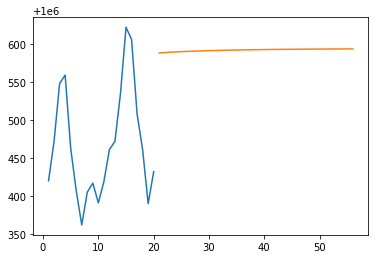

In [210]:
plt.plot(day_new,y[124:])
plt.plot(day_pred,scaler.inverse_transform(lst_output))